<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/09.01-Chau-Ch8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows how to use functions from `scipy` and `tbcontrol` to solve the examples from [Chapter 7](https://ia802909.us.archive.org/32/items/process-control-a-first-course-with-matlab/Process%20Control%20A%20First%20Course%20with%20MATLAB.pdf#page=129) of Pao C. Chau, Process Control: A First Course with MATLAB.

>N.B.: Parts of this notebook were taken from [here](https://github.com/alchemyst/Dynamics-and-Control/blob/master/2_Control/2_Laplace_domain_analysis_of_control_systems/SymPy%20Routh%20Array.ipynb)

In [ ]:
import sympy
sympy.init_printing()
!pip install tbcontrol
from tbcontrol.symbolic import routh

!pip install control
from control import tf, root_locus, series
import numpy as np

     |████████████████████████████████| 339 kB 32.5 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=34d22a31a4e7552ae428527dea9b689c330c3879f43e1526ec956d0591d1efa5
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


## The Routh–Hurwitz Criterion

### Example 7.2, p. 133

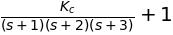

In [ ]:
s = sympy.symbols('s')
Kc = sympy.symbols('K_c', real=True)
cl_den = 1 + Kc*((s + 3)*(s + 2)*(s + 1))**(-1)
cl_den

In [ ]:
cl_ce = cl_den.factor().as_numer_denom()[0]
cl_ce.collect(s)

In [ ]:
A = routh(sympy.Poly(cl_ce, s))
A

⎡   1        11   ⎤
⎢                 ⎥
⎢   6      K_c + 6⎥
⎢                 ⎥
⎢     K_c         ⎥
⎢10 - ───     0   ⎥
⎢      6          ⎥
⎢                 ⎥
⎣K_c + 6      0   ⎦

In [ ]:
sympy.solve([e > 0 for e in A[:, 0]], Kc)

### Example 7.3, p. 133

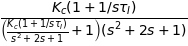

In [ ]:
tauI = sympy.symbols('tau_I', real=True)
Gp = 1/(s**2 + 2*s + 1)
Gc = Kc*(1 + 1/(tauI*s))
Gsc = Gc*Gp/(1+Gc*Gp)
Gsc

In [ ]:
cl_ce_73 = Gsc.factor().as_numer_denom()[1]
cl_ce_73.collect(s)

In [ ]:
A = routh(sympy.Poly(cl_ce_73, s))
A

⎡        τ_I          K_c⋅τ_I + τ_I⎤
⎢                                  ⎥
⎢       2⋅τ_I              K_c     ⎥
⎢                                  ⎥
⎢          K_c                     ⎥
⎢K_c⋅τ_I - ─── + τ_I        0      ⎥
⎢           2                      ⎥
⎢                                  ⎥
⎣        K_c                0      ⎦

In [ ]:
sympy.solve([e > 0 for e in A[:, 0]], Kc)

## Direct-Substitution Analysis

### Example 7.2A, p. 135

In [ ]:
# define angular frequency omega as a symbolic variable
omega = sympy.symbols('\omega', real=True)
# direct substitution
cl_ce_iomega = cl_ce.subs(s, sympy.I*sympy.re(omega)).as_real_imag()

In [ ]:
# real part
cl_ce_iomega[0]

In [ ]:
# imaginary part
cl_ce_iomega[1]

In [ ]:
# solving imaginary part for omegau
omegau = sympy.solve(cl_ce_iomega[1], omega)
omegau

In [ ]:
# solving real part for Kcu
Kcu = sympy.solve(cl_ce_iomega[0], Kc)[0]
Kcu

In [ ]:
# finding max Kcu by pluging max omegau
Kcu_max = Kcu.subs(omega, omegau[2])
Kcu_max

In [ ]:
# finding min Kcu by pluging min omegau
Kcu_min = Kcu.subs(omega, omegau[0])
Kcu_min

### Example 7.3A, p. 135

In [ ]:
# direct substitution
cl_ce_73_iomega = cl_ce_73.subs(s, sympy.I*omega).as_real_imag()

In [ ]:
# real part
cl_ce_73_iomega[0]

In [ ]:
# imaginary part
cl_ce_73_iomega[1]

In [ ]:
# solving imaginary part for Kc
Kcs = sympy.solve(cl_ce_73_iomega[1], Kc)
Kcs

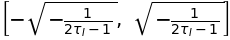

In [ ]:
# plug the result into real part and solve to omegau
omegau = sympy.solve(cl_ce_73_iomega[0].subs(Kc, Kcs[0]), omega)
omegau

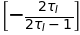

In [ ]:
# plug the result into real part and solve for Kcu
Kcu = sympy.solve(cl_ce_73_iomega[0].subs(omega, omegau[0]), Kc)
Kcu

### Example 7.4, p. 136

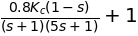

In [ ]:
cl_den_pade = 1 + Kc*(0.8)*(-s + 1)*((5*s + 1)*(s + 1))**(-1)
cl_den_pade

In [ ]:
cl_ce_pade = cl_den_pade.factor().as_numer_denom()[0]
cl_ce_pade.collect(s)

In [ ]:
A = routh(sympy.Poly(cl_ce_pade, s))
A

⎡     5.0       0.8⋅K_c + 1.0⎤
⎢                            ⎥
⎢6.0 - 0.8⋅K_c        0      ⎥
⎢                            ⎥
⎣0.8⋅K_c + 1.0        0      ⎦

In [ ]:
sympy.solve([e > 0 for e in A[:, 0]], Kc)

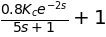

In [ ]:
cl_den = 1 + Kc*(0.8)*sympy.E**(-2*s)*((5*s + 1))**(-1)
cl_den

In [ ]:
cl_ce = cl_den.factor().as_numer_denom()[0]
cl_ce

In [ ]:
cl_ce_iomega = cl_ce.subs(s, sympy.I*omega).as_real_imag()

In [ ]:
cl_ce_iomega[0]

In [ ]:
cl_ce_iomega[1]

In [ ]:
omegau = sympy.nsolve(cl_ce_iomega[1], omega, 0.8)
omegau

In [ ]:
Kcu = sympy.solve(cl_ce_iomega[0].subs(omega, omegau), Kc)[0]
Kcu

## Root-Locus Analysis

Another interesting root-locus teaching tool developed by [Professor Erik Cheever](http://www.swarthmore.edu/NatSci/echeeve1/) (Swarthmore College) could be found [here](https://lpsa.swarthmore.edu/Root_Locus/RLDraw.html).

### Example 7.5, p. 137

Here we will use the `root_locus` function from control. 

As this function works with numerical data, we will assume for letter (a) $\tau_p = 1$ and $K_p = 1$.

In [ ]:
G = tf(1, [1, 1])
G

TransferFunction(array([1]), array([1, 1]))

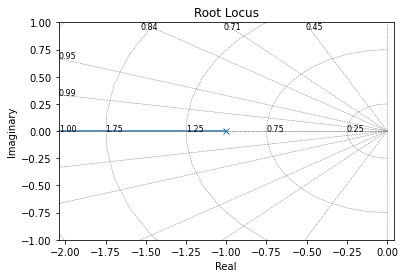

In [ ]:
ex75a = root_locus(G)

For letter (b) we will assume $\tau_1 = 3$ and $\tau_2 = 2$.

In [ ]:
G = tf(1, [6, 5, 1])
G

TransferFunction(array([1]), array([6, 5, 1]))

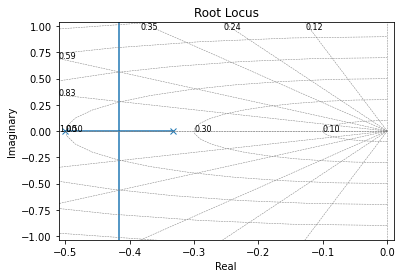

In [ ]:
ex75b = root_locus(G)

### Example 7.2B, p. 139

In [ ]:
G0 = series(tf(1, [1, 3]), tf(1, [1, 2]), tf(1, [1, 1]))
G0

TransferFunction(array([1.]), array([ 1,  6, 11,  6]))

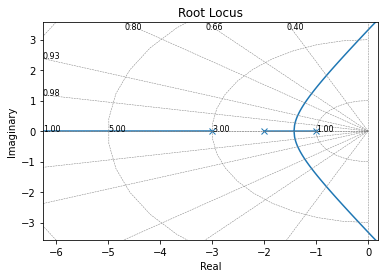

In [ ]:
ex72B = root_locus(G0)

In [ ]:
ex72B[0][0]

array([-3.+0.j, -2.+0.j, -1.+0.j])

In [ ]:
zero_crossings = np.where(np.diff(np.sign(ex72B[0][:,1])))[0] # https://stackoverflow.com/questions/3843017/efficiently-detect-sign-changes-in-python/21171725
Kcu = ex72B[1][zero_crossings+1][0]
Kcu

### Example 7.3B, p. 140

In [ ]:
# setting tauI
tauI = 0.1
# setting the PI transfer function without the proportional gain
GPI = 1 + tf(1, [tauI, 0])
print(GPI)
# setting the process transfer function
Gp = tf(1, [1, 2, 1])
print(Gp)
# setting the "open-loop" transfer function
G = GPI*Gp
print(G)


0.1 s + 1
---------
  0.1 s


      1
-------------
s^2 + 2 s + 1


        0.1 s + 1
-------------------------
0.1 s^3 + 0.2 s^2 + 0.1 s



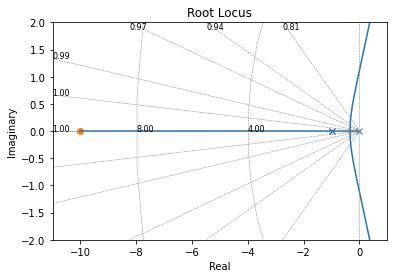

In [ ]:
# plotting the root-locus
ex73B = root_locus(G, xlim=(-11, 1), ylim=(-2, 2))

In [ ]:
zero_crossings = np.where(np.diff(np.sign(ex73B[0][:,1])))[0] 
Kcu = ex73B[1][zero_crossings+1][0]
Kcu

### Example 7.6, p. 140

In [ ]:
G = tf(1, [1, 2])
print(G)


  1
-----
s + 2



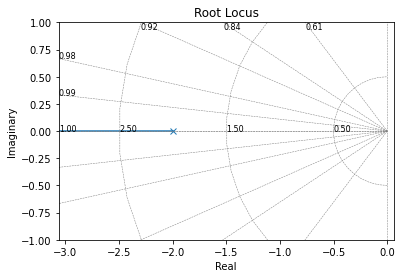

In [ ]:
ex76a = root_locus(G, ylim=(-1, 1))

In [ ]:
G = tf(1, [1, 2])*tf(1, [1, 1])
print(G)


      1
-------------
s^2 + 3 s + 2



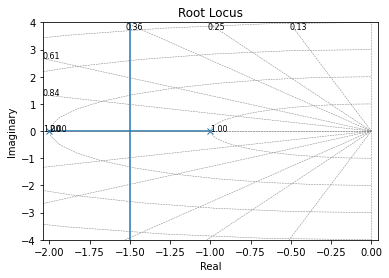

In [ ]:
ex76b = root_locus(G, ylim=(-4, 4))

In [ ]:
G = tf(1, [1, 2])*tf(1, [1, 2])
print(G)


      1
-------------
s^2 + 4 s + 4



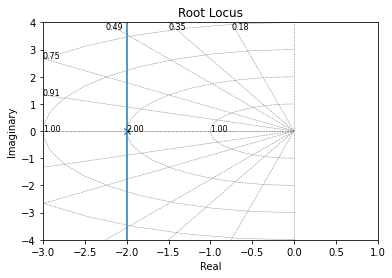

In [ ]:
ex76c = root_locus(G, ylim=(-4, 4), xlim=(-3, 1))

In [ ]:
G = tf([1, 0.5], 1)*tf(1, [1, 2])*tf(1, [1, 1])
print(G)


   s + 0.5
-------------
s^2 + 3 s + 2



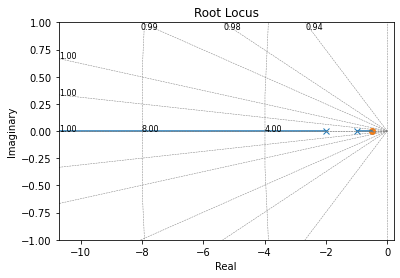

In [ ]:
ex76d1 = root_locus(G, ylim=(-1, 1))

In [ ]:
G = tf([1, 1.5], 1)*tf(1, [1, 2])*tf(1, [1, 1])
print(G)


   s + 1.5
-------------
s^2 + 3 s + 2



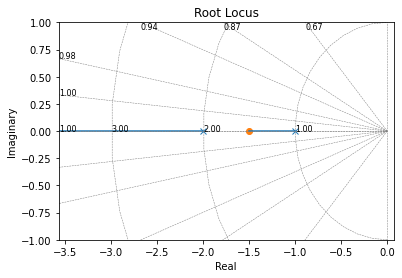

In [ ]:
ex76d2 = root_locus(G, ylim=(-1, 1))

In [ ]:
G = tf([1, 4], 1)*tf(1, [1, 2])*tf(1, [1, 1])
print(G)


    s + 4
-------------
s^2 + 3 s + 2



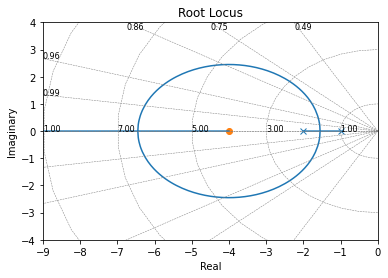

In [ ]:
ex76d3 = root_locus(G, xlim=(-9, 0), ylim=(-4, 4))

### Example 7.5A, p. 143

In [ ]:
G = tf(1, [8, 6, 1])
G

TransferFunction(array([1]), array([8, 6, 1]))

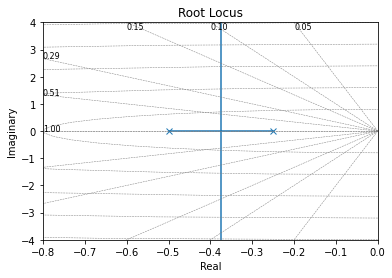

In [ ]:
ex75A = root_locus(G, ylim=(-4, 4), xlim=(-0.8, 0))